<a href="https://colab.research.google.com/github/olga-terekhova/indoor-co2-forecast/blob/main/notebooks/ExploratoryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install third party libraries

!pip install -q hvplot

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas

In [ ]:
# set up data paths

drive_folder = '/MyDrive/Data/flow-co2/data/'
mount_folder = '/content/drive'
data_folder = mount_folder + drive_folder
print(data_folder)

import_csv = 'values.csv'
import_path = data_folder + import_csv
print(import_path)

/content/drive/MyDrive/Data/flow-co2/data/
/content/drive/MyDrive/Data/flow-co2/data/values.csv


In [ ]:
# mount data source

from google.colab import drive
drive.mount(mount_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the file with the timeseries

df = pd.read_csv(import_path)
df

value                      timestamp
0       537  2025-11-12 21:34:07.273367+00
1       538  2025-11-12 21:33:07.244591+00
2       534   2025-11-12 21:32:07.25786+00
3       535  2025-11-12 21:31:07.253168+00
4       536   2025-11-12 21:29:07.20434+00
...     ...                            ...
49115   576  2025-09-30 03:09:07.955874+00
49116   577  2025-09-30 03:08:08.063467+00
49117   579  2025-09-30 03:07:07.956761+00
49118   578  2025-09-30 03:06:08.091092+00
49119   582   2025-09-30 03:05:08.05618+00

[49120 rows x 2 columns]

In [ ]:
# convert value to numeric

df["value"] = pd.to_numeric(df["value"], errors="coerce")
df

value                      timestamp
0      537.0  2025-11-12 21:34:07.273367+00
1      538.0  2025-11-12 21:33:07.244591+00
2      534.0   2025-11-12 21:32:07.25786+00
3      535.0  2025-11-12 21:31:07.253168+00
4      536.0   2025-11-12 21:29:07.20434+00
...      ...                            ...
49115  576.0  2025-09-30 03:09:07.955874+00
49116  577.0  2025-09-30 03:08:08.063467+00
49117  579.0  2025-09-30 03:07:07.956761+00
49118  578.0  2025-09-30 03:06:08.091092+00
49119  582.0   2025-09-30 03:05:08.05618+00

[49120 rows x 2 columns]

In [ ]:
# convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')
df

value                        timestamp
0      537.0 2025-11-12 21:34:07.273367+00:00
1      538.0 2025-11-12 21:33:07.244591+00:00
2      534.0 2025-11-12 21:32:07.257860+00:00
3      535.0 2025-11-12 21:31:07.253168+00:00
4      536.0 2025-11-12 21:29:07.204340+00:00
...      ...                              ...
49115  576.0 2025-09-30 03:09:07.955874+00:00
49116  577.0 2025-09-30 03:08:08.063467+00:00
49117  579.0 2025-09-30 03:07:07.956761+00:00
49118  578.0 2025-09-30 03:06:08.091092+00:00
49119  582.0 2025-09-30 03:05:08.056180+00:00

[49120 rows x 2 columns]

In [ ]:
# remove entries with null values

df = df[df["timestamp"].notnull() & df["value"].notnull()]
df

value                        timestamp
0      537.0 2025-11-12 21:34:07.273367+00:00
1      538.0 2025-11-12 21:33:07.244591+00:00
2      534.0 2025-11-12 21:32:07.257860+00:00
3      535.0 2025-11-12 21:31:07.253168+00:00
4      536.0 2025-11-12 21:29:07.204340+00:00
...      ...                              ...
49115  576.0 2025-09-30 03:09:07.955874+00:00
49116  577.0 2025-09-30 03:08:08.063467+00:00
49117  579.0 2025-09-30 03:07:07.956761+00:00
49118  578.0 2025-09-30 03:06:08.091092+00:00
49119  582.0 2025-09-30 03:05:08.056180+00:00

[49086 rows x 2 columns]

In [ ]:
# calculate local time as additional column

df["timestamp_local"] = df["timestamp"].dt.tz_convert('America/Toronto')
df


/tmp/ipython-input-131361795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp_local"] = df["timestamp"].dt.tz_convert('America/Toronto')


value                        timestamp                  timestamp_local
0      537.0 2025-11-12 21:34:07.273367+00:00 2025-11-12 16:34:07.273367-05:00
1      538.0 2025-11-12 21:33:07.244591+00:00 2025-11-12 16:33:07.244591-05:00
2      534.0 2025-11-12 21:32:07.257860+00:00 2025-11-12 16:32:07.257860-05:00
3      535.0 2025-11-12 21:31:07.253168+00:00 2025-11-12 16:31:07.253168-05:00
4      536.0 2025-11-12 21:29:07.204340+00:00 2025-11-12 16:29:07.204340-05:00
...      ...                              ...                              ...
49115  576.0 2025-09-30 03:09:07.955874+00:00 2025-09-29 23:09:07.955874-04:00
49116  577.0 2025-09-30 03:08:08.063467+00:00 2025-09-29 23:08:08.063467-04:00
49117  579.0 2025-09-30 03:07:07.956761+00:00 2025-09-29 23:07:07.956761-04:00
49118  578.0 2025-09-30 03:06:08.091092+00:00 2025-09-29 23:06:08.091092-04:00
49119  582.0 2025-09-30 03:05:08.056180+00:00 2025-09-29 23:05:08.056180-04:00

[49086 rows x 3 columns]

In [ ]:
# move timestamp into an index assumed to have frequency of 1 minute

df["timestamp"] = df["timestamp"].dt.floor(freq="min")
df = df.set_index("timestamp")
df

/tmp/ipython-input-520755465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp"] = df["timestamp"].dt.floor(freq="min")


value                  timestamp_local
timestamp                                                        
2025-11-12 21:34:00+00:00  537.0 2025-11-12 16:34:07.273367-05:00
2025-11-12 21:33:00+00:00  538.0 2025-11-12 16:33:07.244591-05:00
2025-11-12 21:32:00+00:00  534.0 2025-11-12 16:32:07.257860-05:00
2025-11-12 21:31:00+00:00  535.0 2025-11-12 16:31:07.253168-05:00
2025-11-12 21:29:00+00:00  536.0 2025-11-12 16:29:07.204340-05:00
...                          ...                              ...
2025-09-30 03:09:00+00:00  576.0 2025-09-29 23:09:07.955874-04:00
2025-09-30 03:08:00+00:00  577.0 2025-09-29 23:08:08.063467-04:00
2025-09-30 03:07:00+00:00  579.0 2025-09-29 23:07:07.956761-04:00
2025-09-30 03:06:00+00:00  578.0 2025-09-29 23:06:08.091092-04:00
2025-09-30 03:05:00+00:00  582.0 2025-09-29 23:05:08.056180-04:00

[49086 rows x 2 columns]

In [ ]:
# remove duplicates

dupl = df.index.duplicated(keep='first')
count = (dupl == True).sum()
print(count)

df = df[~dupl]
df

143


value                  timestamp_local
timestamp                                                        
2025-11-12 21:34:00+00:00  537.0 2025-11-12 16:34:07.273367-05:00
2025-11-12 21:33:00+00:00  538.0 2025-11-12 16:33:07.244591-05:00
2025-11-12 21:32:00+00:00  534.0 2025-11-12 16:32:07.257860-05:00
2025-11-12 21:31:00+00:00  535.0 2025-11-12 16:31:07.253168-05:00
2025-11-12 21:29:00+00:00  536.0 2025-11-12 16:29:07.204340-05:00
...                          ...                              ...
2025-09-30 03:09:00+00:00  576.0 2025-09-29 23:09:07.955874-04:00
2025-09-30 03:08:00+00:00  577.0 2025-09-29 23:08:08.063467-04:00
2025-09-30 03:07:00+00:00  579.0 2025-09-29 23:07:07.956761-04:00
2025-09-30 03:06:00+00:00  578.0 2025-09-29 23:06:08.091092-04:00
2025-09-30 03:05:00+00:00  582.0 2025-09-29 23:05:08.056180-04:00

[48943 rows x 2 columns]

In [ ]:
# ensuring the index has the frequency of 1 minute, pad if necessary

df_non_padded = df.copy()
df = df.asfreq("min", method='pad')  # converts to specified frequency, pads missing values
df_padded = df[~df.index.isin(df_non_padded.index)]
df

value                  timestamp_local
timestamp                                                        
2025-09-30 03:05:00+00:00  582.0 2025-09-29 23:05:08.056180-04:00
2025-09-30 03:06:00+00:00  578.0 2025-09-29 23:06:08.091092-04:00
2025-09-30 03:07:00+00:00  579.0 2025-09-29 23:07:07.956761-04:00
2025-09-30 03:08:00+00:00  577.0 2025-09-29 23:08:08.063467-04:00
2025-09-30 03:09:00+00:00  576.0 2025-09-29 23:09:07.955874-04:00
...                          ...                              ...
2025-11-12 21:30:00+00:00  535.0 2025-11-12 16:31:07.253168-05:00
2025-11-12 21:31:00+00:00  535.0 2025-11-12 16:31:07.253168-05:00
2025-11-12 21:32:00+00:00  534.0 2025-11-12 16:32:07.257860-05:00
2025-11-12 21:33:00+00:00  538.0 2025-11-12 16:33:07.244591-05:00
2025-11-12 21:34:00+00:00  537.0 2025-11-12 16:34:07.273367-05:00

[63030 rows x 2 columns]

In [ ]:
# df_pd_freq = df_pd_freq.sort_index()
# df_pd_padded = df_pd_padded.sort_index()

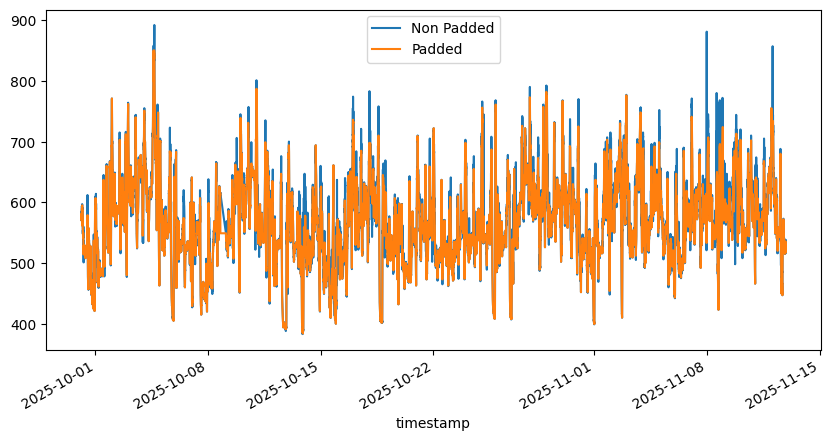

In [ ]:
# plot time series original and padded values on the same plot

fig, ax = plt.subplots()
df_non_padded.plot(ax=ax, y="value", label="Non Padded", subplots=False)
df_padded.plot(ax=ax, y="value", label="Padded", subplots=False)
plt.show()

In [ ]:
# plot time series original and padded values on hvplot to zoom in

plot = df_non_padded.hvplot.scatter(label="Dataset Source") * df_padded.hvplot.scatter(label="Padded Values")
plot

:Overlay
   .Scatter.Dataset_Source :Scatter   [timestamp]   (value)
   .Scatter.Padded_Values  :Scatter   [timestamp]   (value)

In [ ]:
# decompose into seasonality and trends assuming daily seasonality

from statsmodels.tsa.seasonal import seasonal_decompose, STL
plt.rcParams["figure.figsize"] = [10, 5]
freqseason_day = 60*24 # minutes in a day
df_eda_decomposed = seasonal_decompose(df["value"], model='additive', period = freqseason_day)

In [ ]:
df_eda_decomposed.seasonal.hvplot()

:Curve   [timestamp]   (seasonal)

In [ ]:
df_eda_decomposed.trend.hvplot()

:Curve   [timestamp]   (trend)

In [ ]:
# decompose into seasonality and trends assuming weekly seasonality

freqseason_week = 60*24*7 # minutes in a week
df_eda_decomposed_week = seasonal_decompose(df["value"], model='additive', period = freqseason_week)

In [ ]:
df_eda_decomposed_week.seasonal.hvplot()

:Curve   [timestamp]   (seasonal)

In [ ]:
df_eda_decomposed_week.trend.hvplot()

:Curve   [timestamp]   (trend)

In [ ]:
# exploring multi seasonality - visually it looks like daily seasonality has more regularity than weekly
# takes a lot of time, commenting out for now

#from statsmodels.tsa.seasonal import MSTL

#res = MSTL(df["value"], periods=(freqseason_day, freqseason_week)).fit()
#res.plot()
#plt.tight_layout()
#plt.show()

In [ ]:
# test for stationary - results contradicting. Assuming it's non-stationary due to the presence of trend.

from statsmodels.tsa.stattools import adfuller, kpss

def format_test_results(output, critical_values, decision, test):
    """Format the test results into a pandas Series."""
    output_dict = {
        'Test Statistic': output[0],
        'p-value': output[1],
        'Number of lags': output[2],
        'Decision': decision
    }
    for key, value in critical_values.items():
        output_dict[f"Critical Value ({key})"] = value
    return pd.Series(output_dict, name=test)


def adf_results(data):
    """Perform ADF test and format results."""
    output = adfuller(data)
    decision = "Stationary" if output[1] < 0.05 else "Non-Stationary"
    return format_test_results(output, output[4], decision, test='ADF')


def kpss_results(data):
    """Perform KPSS test and format results."""
    output = kpss(data)
    decision = "Stationary" if output[1] >= 0.05 else "Non-Stationary"
    return format_test_results(output, output[3], decision, test='KPSS')

adf_output = adf_results(df["value"])
kpss_output = kpss_results(df["value"])

pd.concat([adf_output, kpss_output], axis=1)

/tmp/ipython-input-1518869817.py:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  output = kpss(data)


ADF            KPSS
Test Statistic         -15.901164        1.573357
p-value                       0.0            0.01
Number of lags                 38             145
Decision               Stationary  Non-Stationary
Critical Value (1%)     -3.430454           0.739
Critical Value (5%)     -2.861586           0.463
Critical Value (10%)    -2.566794           0.347
Critical Value (2.5%)         NaN           0.574

In [ ]:
# test for normality - not normal

from scipy.stats import shapiro, normaltest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad


def is_normal(test, p_level=0.05):
    """
    Determines if data is normally distributed based on test statistics.

    Parameters:
        test: Tuple of (statistic, p-value) from normality test
        p_level: Significance level (default: 0.05)

    Returns:
        str: 'Normal' if p-value > p_level, 'Not Normal' otherwise
    """
    stat, pval = test
    return 'Normal' if pval > 0.05 else 'Not Normal'

print("Shapiro-Wilk Test:", is_normal(shapiro(df["value"])))
print("D'Agostino-Pearson Test:", is_normal(normaltest(df["value"])))
print("Anderson–Darling Test:",is_normal(normal_ad(df["value"])))
print("Kolmogorov–Smirnov Test:", is_normal(kstest_normal(df["value"])))

Shapiro-Wilk Test: Not Normal
D'Agostino-Pearson Test: Not Normal
Anderson–Darling Test: Not Normal
Kolmogorov–Smirnov Test: Not Normal


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 63030.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# resampling for 15 min intervals
df_15 = df.resample("15min").mean()
lag_15min = 24*4 # 15-min intervals in a day
y = df_15["value"]
y

timestamp
2025-09-30 03:00:00+00:00    576.700000
2025-09-30 03:15:00+00:00    575.266667
2025-09-30 03:30:00+00:00    578.866667
2025-09-30 03:45:00+00:00    588.733333
2025-09-30 04:00:00+00:00    581.866667
                                ...    
2025-11-12 20:30:00+00:00    531.266667
2025-11-12 20:45:00+00:00    526.666667
2025-11-12 21:00:00+00:00    521.400000
2025-11-12 21:15:00+00:00    525.266667
2025-11-12 21:30:00+00:00    535.800000
Freq: 15min, Name: value, Length: 4203, dtype: float64

In [ ]:
!pip install -q pmdarima

In [ ]:
lag_1min = 24*60
lag_15min = 24*4

In [ ]:
from pmdarima import auto_arima

model = auto_arima(
    df["value"],
    seasonal=True,
    m=lag_1min,                   # seasonal period for 15-minute daily cycle
    d=None,                 # let auto_arima choose differencing
    D=None,                 # let auto_arima choose seasonal differencing
    start_p=0, max_p=3,     # AR terms
    start_q=0, max_q=3,     # MA terms
    start_P=0, max_P=0,     # seasonal AR
    start_Q=0, max_Q=0,     # seasonal MA
    trace=True,             # print model search results
    error_action="ignore",  # ignore errors and keep trying
    suppress_warnings=True,
    stepwise=True           # fast stepwise search (recommended)
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[1440] intercept   : AIC=374365.905, Time=1.81 sec
 ARIMA(1,1,0)(0,0,0)[1440] intercept   : AIC=368476.029, Time=2.31 sec
 ARIMA(0,1,1)(0,0,0)[1440] intercept   : AIC=368558.436, Time=9.46 sec
 ARIMA(0,1,0)(0,0,0)[1440]             : AIC=374363.907, Time=0.76 sec
 ARIMA(2,1,0)(0,0,0)[1440] intercept   : AIC=368398.126, Time=3.18 sec
 ARIMA(3,1,0)(0,0,0)[1440] intercept   : AIC=368375.663, Time=7.71 sec
 ARIMA(3,1,1)(0,0,0)[1440] intercept   : AIC=368149.100, Time=48.39 sec
 ARIMA(2,1,1)(0,0,0)[1440] intercept   : AIC=368383.550, Time=28.76 sec
 ARIMA(3,1,2)(0,0,0)[1440] intercept   : AIC=368175.837, Time=72.48 sec
 ARIMA(2,1,2)(0,0,0)[1440] intercept   : AIC=368163.665, Time=48.43 sec
 ARIMA(3,1,1)(0,0,0)[1440]             : AIC=368147.101, Time=16.59 sec
 ARIMA(2,1,1)(0,0,0)[1440]             : AIC=368381.552, Time=12.04 sec
 ARIMA(3,1,0)(0,0,0)[1440]             : AIC=368373.664, Time=2.63 sec
 ARIMA(3,1,2)(0,0,0)[1440]  

Auto ARIMA results for 1min original and 1440 periods in a season:  
Best model:  ARIMA(3,1,1)(0,0,0)[1440]          
Total fit time: 512.642 seconds

In [ ]:
model_15 = auto_arima(
    df_15["value"],
    seasonal=True,
    m=lag_15min,                   # seasonal period for 15-minute daily cycle
    d=None,                 # let auto_arima choose differencing
    D=None,                 # let auto_arima choose seasonal differencing
    start_p=0, max_p=3,     # AR terms
    start_q=0, max_q=3,     # MA terms
    start_P=0, max_P=0,     # seasonal AR
    start_Q=0, max_Q=0,     # seasonal MA
    trace=True,             # print model search results
    error_action="ignore",  # ignore errors and keep trying
    suppress_warnings=True,
    stepwise=True           # fast stepwise search (recommended)
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[96] intercept   : AIC=38082.976, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[96] intercept   : AIC=37349.454, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[96] intercept   : AIC=37321.087, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[96]             : AIC=38080.977, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[96] intercept   : AIC=37296.441, Time=2.65 sec
 ARIMA(2,1,1)(0,0,0)[96] intercept   : AIC=37025.599, Time=5.56 sec
 ARIMA(2,1,0)(0,0,0)[96] intercept   : AIC=37289.097, Time=0.72 sec
 ARIMA(3,1,1)(0,0,0)[96] intercept   : AIC=37023.744, Time=9.12 sec
 ARIMA(3,1,0)(0,0,0)[96] intercept   : AIC=37286.733, Time=0.71 sec
 ARIMA(3,1,2)(0,0,0)[96] intercept   : AIC=37018.623, Time=12.65 sec
 ARIMA(2,1,2)(0,0,0)[96] intercept   : AIC=37022.541, Time=2.87 sec
 ARIMA(3,1,3)(0,0,0)[96] intercept   : AIC=37016.623, Time=5.93 sec
 ARIMA(2,1,3)(0,0,0)[96] intercept   : AIC=37013.419, Time=6.31 sec
 ARIMA(1,1,3)(0,0,0)[96] intercept   : AIC=37059.738, Time=3.61 sec
 ARI

Auto ARIMA results for a 15min downsample and 96 periods in a season:  
Best model:  ARIMA(2,1,3)(0,0,0)[96]          
Total fit time: 102.029 seconds



In [ ]:
# SARIMAX for the original time series with 1 min frequency

#from statsmodels.tsa.statespace.sarimax import SARIMAX
#model = SARIMAX(df["value"],
#                trend="c",
#                order=(3,1,1),  # non-seasonal part (p,d,q)
#                seasonal_order=(0,0,0,lag_1min), # seasonal part (P,D,Q,s)
#                enforce_stationarity=False
#               ).fit()

# impossible to run, crashes

In [ ]:
# SARIMAX for the 15 min downsample
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_15 = SARIMAX(df_15["value"],
                trend="c",
                order=(2,1,3),  # non-seasonal part (p,d,q)
                seasonal_order=(0,0,0,lag_15min), # seasonal part (P,D,Q,s)
                enforce_stationarity=False
               ).fit()

# manages to run

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# test for homoskedasticity (15min downsample)
from statsmodels.stats.api import (het_breuschpagan, het_white)
from statsmodels.tools.tools import add_constant

def het_test(model, test=het_breuschpagan, p_level=0.05):
    """
    Determines if residuals exhibit heteroskedasticity based on test statistics.

    Parameters:
        model: Fitted model object containing residuals
               and fitted values
        test: Statistical test function (default: het_breuschpagan)
        p_level: Significance level (default: 0.05)

    Returns:
        str: 'Homoskedastic' if p-value > p_level,
             'Heteroskedastic' otherwise
    """
    lm, lm_pvalue, fvalue, f_pvalue = test(
        model.filter_results.standardized_forecasts_error[0],
        add_constant(model.fittedvalues)
    )

    return "Heteroskedastic" if f_pvalue < p_level else "Homoskedastic"




print("Breusch-Pagan Test:", het_test(model_15, test=het_breuschpagan))
print("White Test:", het_test(model_15, test=het_white))

Breusch-Pagan Test: Heteroskedastic
White Test: Heteroskedastic


In [ ]:
# testing for autocorrelation (15min downsample)

from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_test = acorr_ljungbox(df_15["value"],
                            lags=lag_15min,
                            return_df=True,
                            #period = lag_15min
                            )

ljung_test['eval'] = ljung_test['lb_pvalue'] < 0.05
print(ljung_test)

         lb_stat  lb_pvalue  eval
1    3756.812568        0.0  True
2    6769.162859        0.0  True
3    9078.627369        0.0  True
4   10807.171488        0.0  True
5   12098.081361        0.0  True
..           ...        ...   ...
92  32125.285030        0.0  True
93  32306.492317        0.0  True
94  32571.978057        0.0  True
95  32919.159511        0.0  True
96  33317.567552        0.0  True

[96 rows x 3 columns]


In [ ]:
# apply boxcox transformation in an attempt to normalize data

from scipy.stats import boxcox
xt, lmbda = boxcox(df_15['value'])
print(lmbda)

# Convert xt into a pandas Series
xts = pd.Series(xt, index=df_15.index)

0.4436301244133205


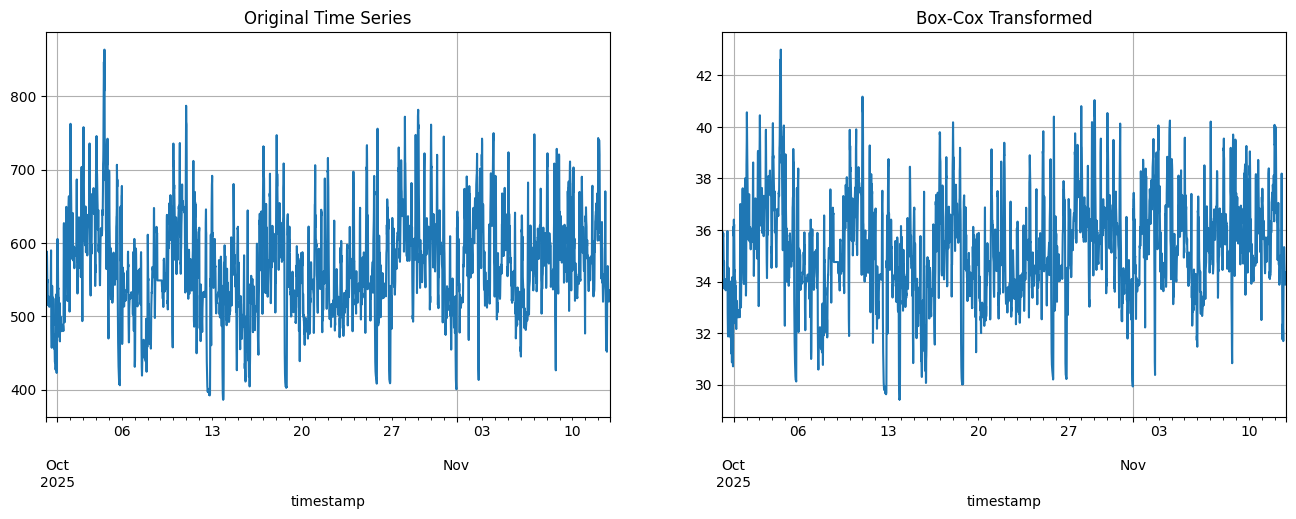

In [ ]:
# compare distribution before and after box-cox

fig, ax = plt.subplots(1, 2, figsize=(16,5))
df_15["value"].plot(ax=ax[0])
ax[0].set_title('Original Time Series')
ax[0].grid(True)
xts.plot(ax=ax[1])
ax[1].set_title('Box-Cox Transformed')
ax[1].grid(True);

In [ ]:
# run sarimax on data after box-cox transformation

model_bx = SARIMAX(xts,
                trend="c",
                order=(2,1,3),  # non-seasonal part (p,d,q)
                seasonal_order=(0,0,0,lag_15min), # seasonal part (P,D,Q,s)
                enforce_stationarity=False
               ).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


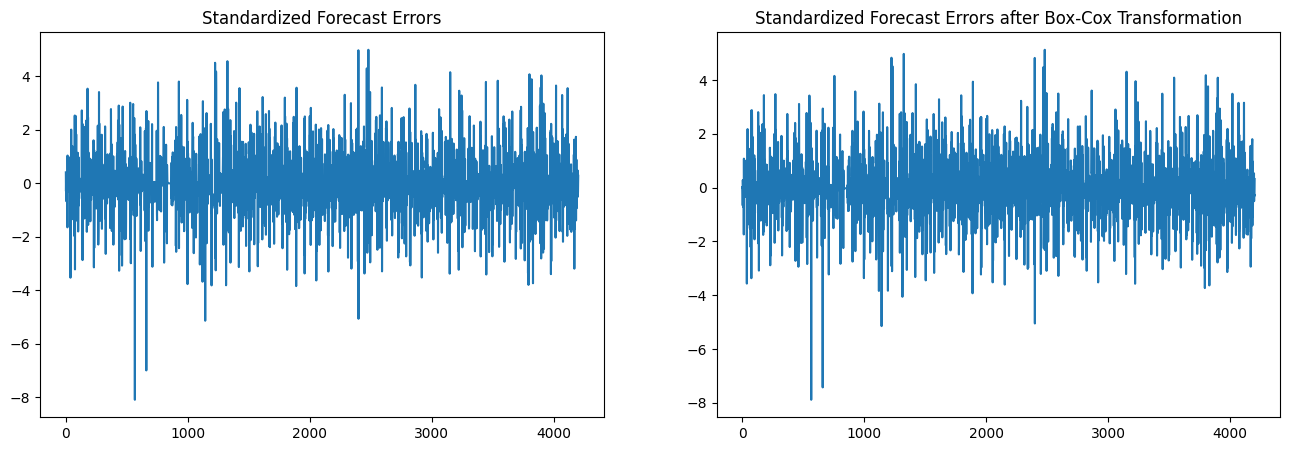

In [ ]:
# compare the distributions visually
fig, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].plot(model_15.filter_results.standardized_forecasts_error[0])
ax[1].plot(model_bx.filter_results.standardized_forecasts_error[0])
ax[0].set_title("Standardized Forecast Errors")
ax[1].set_title("Standardized Forecast Errors after Box-Cox Transformation");

In [ ]:
# repeat test for normality after the box-cox transformation

s_resid = model_bx.filter_results.standardized_forecasts_error[0]
print("Shapiro-Wilk Test:", is_normal(shapiro(s_resid)))
print("D'Agostino-Pearson Test:", is_normal(normaltest(s_resid)))
print("Anderson–Darling Test:",is_normal(normal_ad(s_resid)))
print("Kolmogorov–Smirnov Test:", is_normal(kstest_normal(s_resid)))

# the residuals are still not normal

Shapiro-Wilk Test: Not Normal
D'Agostino-Pearson Test: Not Normal
Anderson–Darling Test: Not Normal
Kolmogorov–Smirnov Test: Not Normal


In [ ]:
# repeat test for homoskedasticity on residuals after box-cox transformation

print("White Test:", het_test(model_bx,
                              test=het_white))
print("Breusch-Pagan Test:", het_test(model_bx,
                                      test=het_breuschpagan))

White Test: Homoskedastic
Breusch-Pagan Test: Homoskedastic


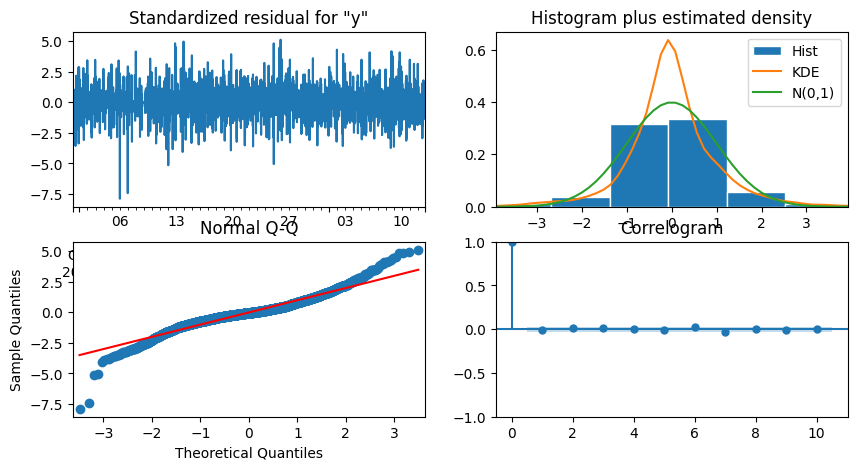

In [ ]:
model_bx.plot_diagnostics();

In [ ]:
# testing for autocorrelation after box-cox transformation, residuals only

ljung_test = acorr_ljungbox(model_bx.filter_results.standardized_forecasts_error[0],
                            lags=lag_15min,
                            return_df=True,
                            #period = freqseason_day
                            )

ljung_test['eval'] = ljung_test['lb_pvalue'] < 0.05
print(ljung_test)

       lb_stat     lb_pvalue   eval
1     0.433592  5.102319e-01  False
2     1.859429  3.946663e-01  False
3     3.265408  3.524863e-01  False
4     3.265942  5.143465e-01  False
5     3.365385  6.438472e-01  False
..         ...           ...    ...
92  152.739088  7.178057e-05   True
93  153.295444  8.366970e-05   True
94  156.891150  5.105746e-05   True
95  161.185397  2.659263e-05   True
96  282.144055  3.296106e-20   True

[96 rows x 3 columns]
